<div style="text-align: center">
    <img src='UDC.png' width='40%'>
    <img src='ICI.png' width='20%'>
</div>
<div style="text-align: center">
    <p style="text-align: center">Universidad de Colima<br>
    Facultad de Ingeniería Mecánica y Eléctrica<br>
    Ingeniería en Computación Inteligente</p>
    <p style="text-align: center">Anomalias<br>
    Análisis de Series Temporales</p>
    <p style="text-align: center">
    Larios Bravo Cristian Armando 20188165<br>
    </p>
    <p style="text-align: center">6°D</p>
</div>
<div style="text-align: right">
    Lugar: Mexico, Colima, Coquimatlan.<br>
    Fecha: 19/04/2024.
</div>

# Problema para la detección de anomalías en sensores de temperatura en una planta de manufactura

### En una planta de manufactura, se utilizan sensores para monitorear la temperatura en diferentes partes de la línea de producción. Estos sensores registran lecturas de temperatura cada hora durante un periodo de varios meses. Tu tarea es analizar estos datos para identificar posibles anomalías en las lecturas de temperatura que puedan indicar problemas en el proceso de fabricación o fallos en los equipos.

### Parte 1: Generación de Datos
Utiliza un programa en Python para generar datos simulados que representen las lecturas de temperatura de los sensores durante varios meses. Los datos deben incluir una variedad de lecturas normales, así como algunas lecturas anómalas que simulen problemas en el proceso de fabricación o fallos en los equipos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Generar datos de 3 meses
# 24h x 90 dias = 2160 datos 
np.random.seed(0)
dias = pd.date_range(start='2023-01-01', periods= 2160, freq='h')
temperaturas = np.random.normal(loc=24, scale=200, size=2160) #temperaturas normales

In [3]:
# Introducir anomalías
indices_anomalos = np.random.choice(range(90), size=10, replace=False)
temperaturas[indices_anomalos] *= 10 # Hacer las anomalías significativamente más grandes, puedes cambiar el factor para apreciar los cambios.

In [4]:
# Crear DataFrame
df_temperaturas = pd.DataFrame({'Fecha': dias, 'Temperaturas': temperaturas})

### Parte 2: Análisis de Datos
Una vez que hayas generado los datos, realiza un análisis para identificar posibles anomalías en las lecturas de temperatura. Algunas preguntas que podrías explorar incluyen:
- ¿Existen lecturas de temperatura que se desvíen significativamente del rango esperado para esa área de la planta?
- ¿Hay algún patrón o tendencia en las lecturas anómalas?
- ¿Qué características tienen las lecturas anómalas en comparación con las lecturas normales?

In [5]:
# Utilizar Isolation Forest para detectar anomalías
iso_forest = IsolationForest(contamination=0.02) # Suponemos que aproximadamente el 2% de los datos son anomalías
anomalies = iso_forest.fit_predict(df_temperaturas[['Temperaturas']])
df_temperaturas['Anomaly'] = anomalies == -1
# Imprimir en pantalla las anomalías
print(f"Numeros de anomalías detectadas: {len(df_temperaturas[df_temperaturas['Anomaly']])}")

Numeros de anomalías detectadas: 44


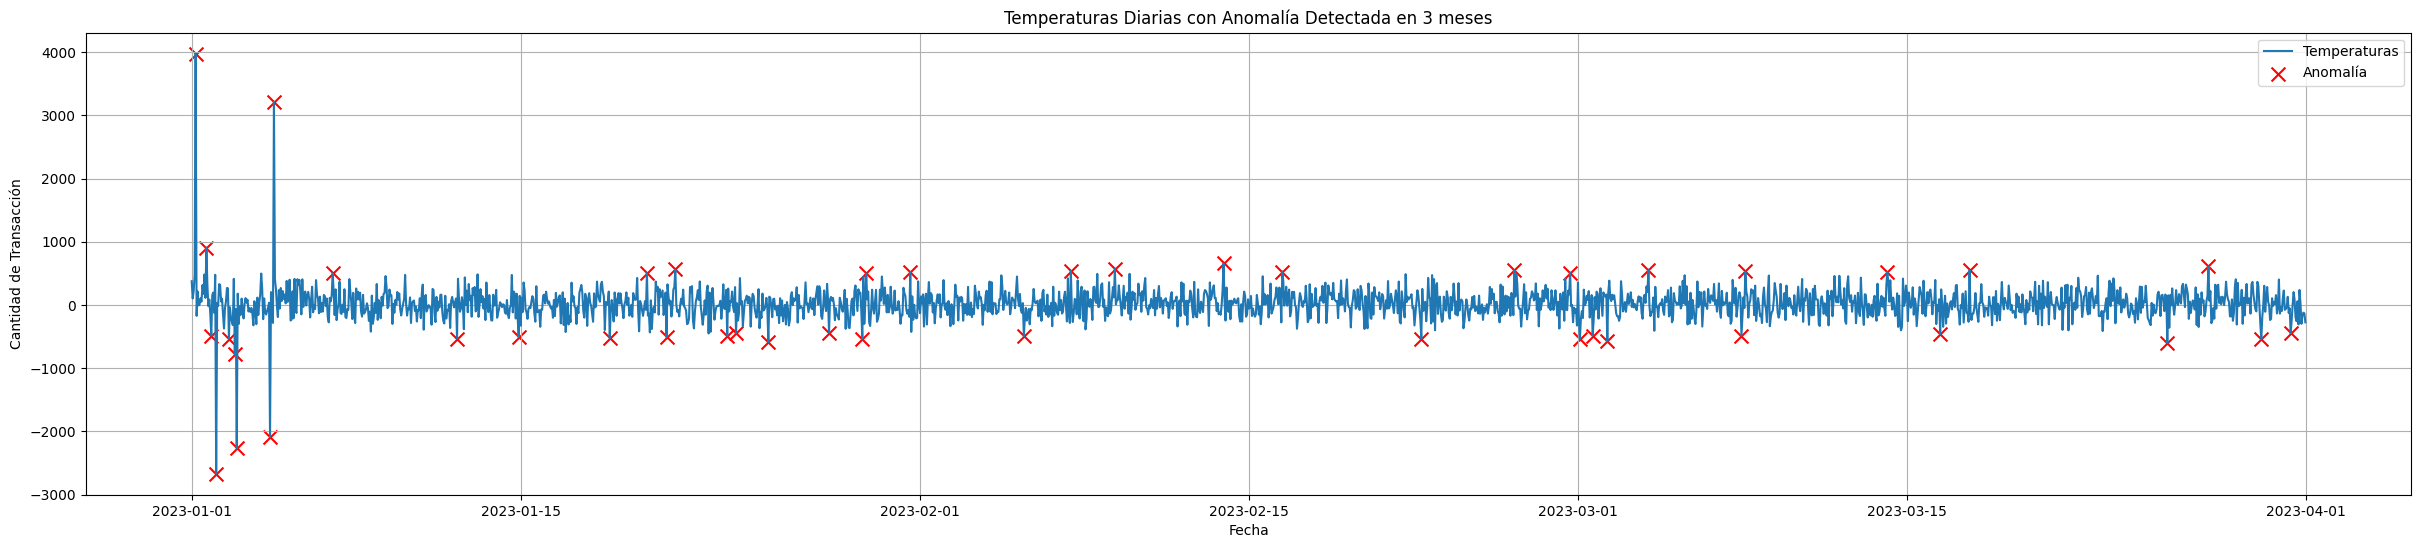

In [6]:
# Gráfica de Temperaturas y anomalías en 3 meses
plt.figure(figsize=(30, 6))
plt.plot(df_temperaturas['Fecha'], df_temperaturas['Temperaturas'], label='Temperaturas')
plt.scatter(df_temperaturas.loc[df_temperaturas['Anomaly'], 'Fecha'],
df_temperaturas.loc[df_temperaturas['Anomaly'], 'Temperaturas'], color='red', label='Anomalía', marker='x', s=100) # Marcar anomalías con una X roja
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacción')
plt.title('Temperaturas Diarias con Anomalía Detectada en 3 meses')
plt.legend()
plt.grid(True)
plt.show()

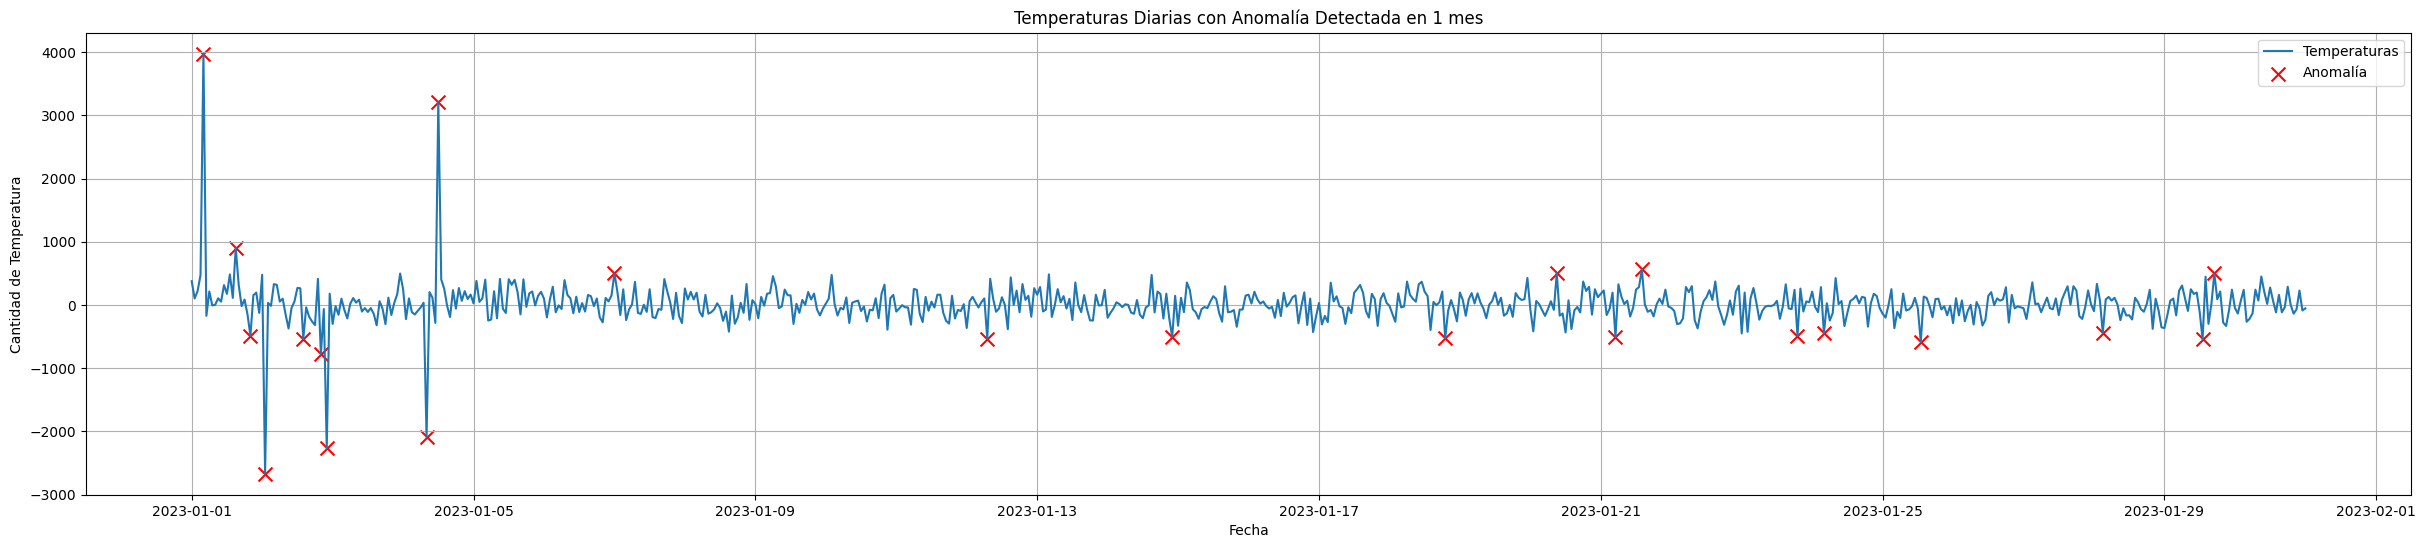

In [7]:
# Ver anomalias en un segmento de 14 dias para apreciar mejor 
df31d = df_temperaturas[(df_temperaturas['Fecha'] >= '2023-01-01') & (df_temperaturas['Fecha'] <= '2023-01-31')]
plt.figure(figsize=(30, 6))
plt.plot(df31d['Fecha'], df31d['Temperaturas'], label='Temperaturas')
plt.scatter(df31d.loc[df31d['Anomaly'], 'Fecha'],
df31d.loc[df31d['Anomaly'], 'Temperaturas'], color='red', label='Anomalía', marker='x', s=100) # Marcar anomalías con una X roja

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Temperatura')
plt.title('Temperaturas Diarias con Anomalía Detectada en 1 mes')
plt.legend()
plt.grid(True)
plt.show()

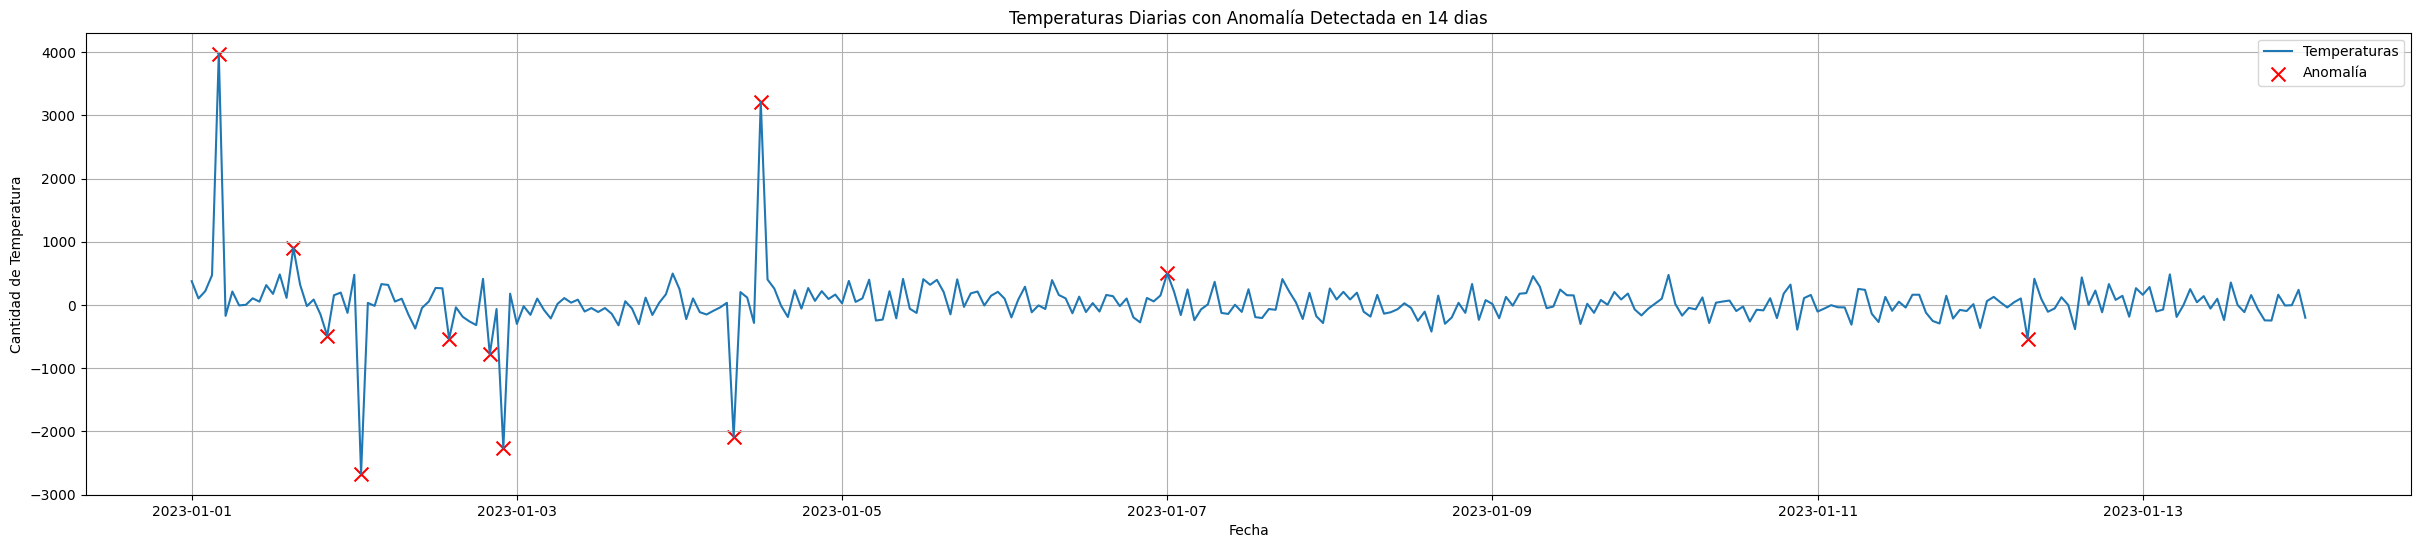

In [8]:
# Ver anomalias en un segmento de 14 dias para apreciar mejor 
df14d = df_temperaturas[(df_temperaturas['Fecha'] >= '2023-01-01') & (df_temperaturas['Fecha'] <= '2023-01-14')]
plt.figure(figsize=(30, 6))
plt.plot(df14d['Fecha'], df14d['Temperaturas'], label='Temperaturas')
plt.scatter(df14d.loc[df14d['Anomaly'], 'Fecha'],
df14d.loc[df14d['Anomaly'], 'Temperaturas'], color='red', label='Anomalía', marker='x', s=100) # Marcar anomalías con una X roja

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Temperatura')
plt.title('Temperaturas Diarias con Anomalía Detectada en 14 dias')
plt.legend()
plt.grid(True)
plt.show()

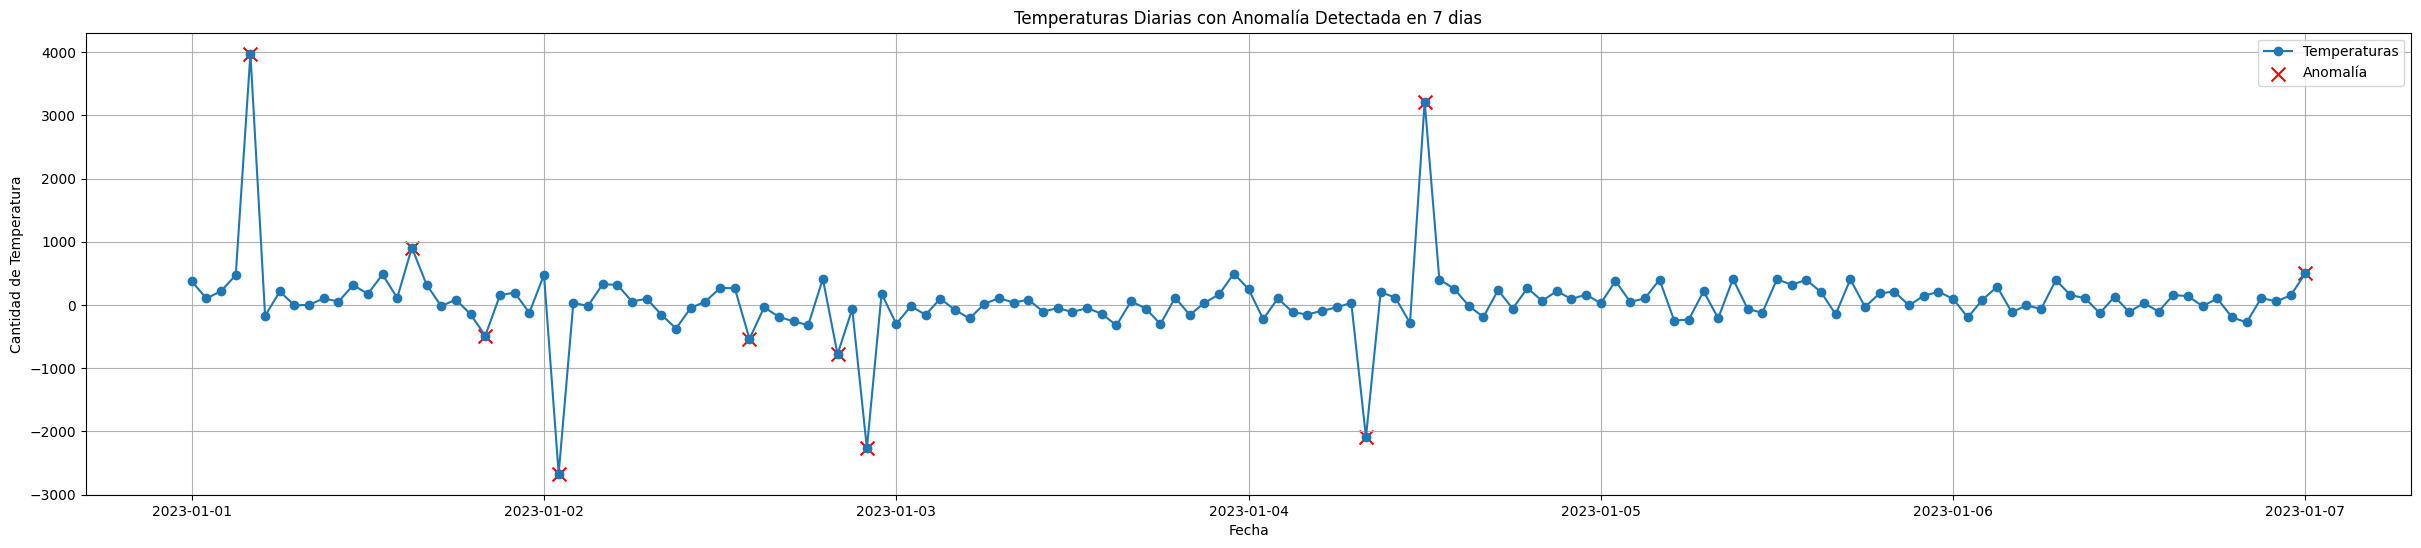

In [9]:
# Ver anomalias en un segmento de 7 dias para apreciar mejor 
df7d = df_temperaturas[(df_temperaturas['Fecha'] >= '2023-01-01') & (df_temperaturas['Fecha'] <= '2023-01-07')]
plt.figure(figsize=(30, 6))
plt.plot(df7d['Fecha'], df7d['Temperaturas'], label='Temperaturas', marker='o')
plt.scatter(df7d.loc[df7d['Anomaly'], 'Fecha'],
df7d.loc[df7d['Anomaly'], 'Temperaturas'], color='red', label='Anomalía', marker='x', s=100) # Marcar anomalías con una X roja
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Temperatura')
plt.title('Temperaturas Diarias con Anomalía Detectada en 7 dias')
plt.legend()
plt.grid(True)
plt.show()

#### - ¿Existen lecturas de temperatura que se desvíen significativamente del rango esperado para esa área de la planta?


* Sí, hay 44 lecturas de temperatura que se desvian mucho.

#### - ¿Hay algún patrón o tendencia en las lecturas anómalas?

* Si, en el primer mes sucedieron la mitad de las anomalias.

#### - ¿Qué características tienen las lecturas anómalas en comparación con las lecturas normales?

* Son picos positivos o negativos en la grafica que no son comunes y se muestran como ruido, son valores muy altos o muy negativos, en comparación de las lecturas normales que tienden a ser muy similares entre ellas.

### Parte 3: Informe de Resultados
Escribe un informe que resuma tus hallazgos. Incluye gráficos o visualizaciones que ayuden a identificar las anomalías en los datos de temperatura. Además, discute cualquier insight o conclusión que hayas obtenido del análisis de los datos y cómo podrían utilizarse para mejorar el mantenimiento preventivo o la eficiencia en la planta de manufactura.

* Las mediciones de temperatura en base al análisis que realicé dicen que, la temperatura no varío mucho, aunque cuando hubo variaciones, fueron muy altas o muy bajas, esto puede ser tomado como errores en el sensor de temperatura u ocacionaron algo que afectara la temperatura, por lo que hago incapie en que de las 44 lecturas de temperatura anomalas ya sean muy altas o bajas, la mitad ocurrieron en el primer mes, en los demas meses se pudo cubrir mejor la falla.

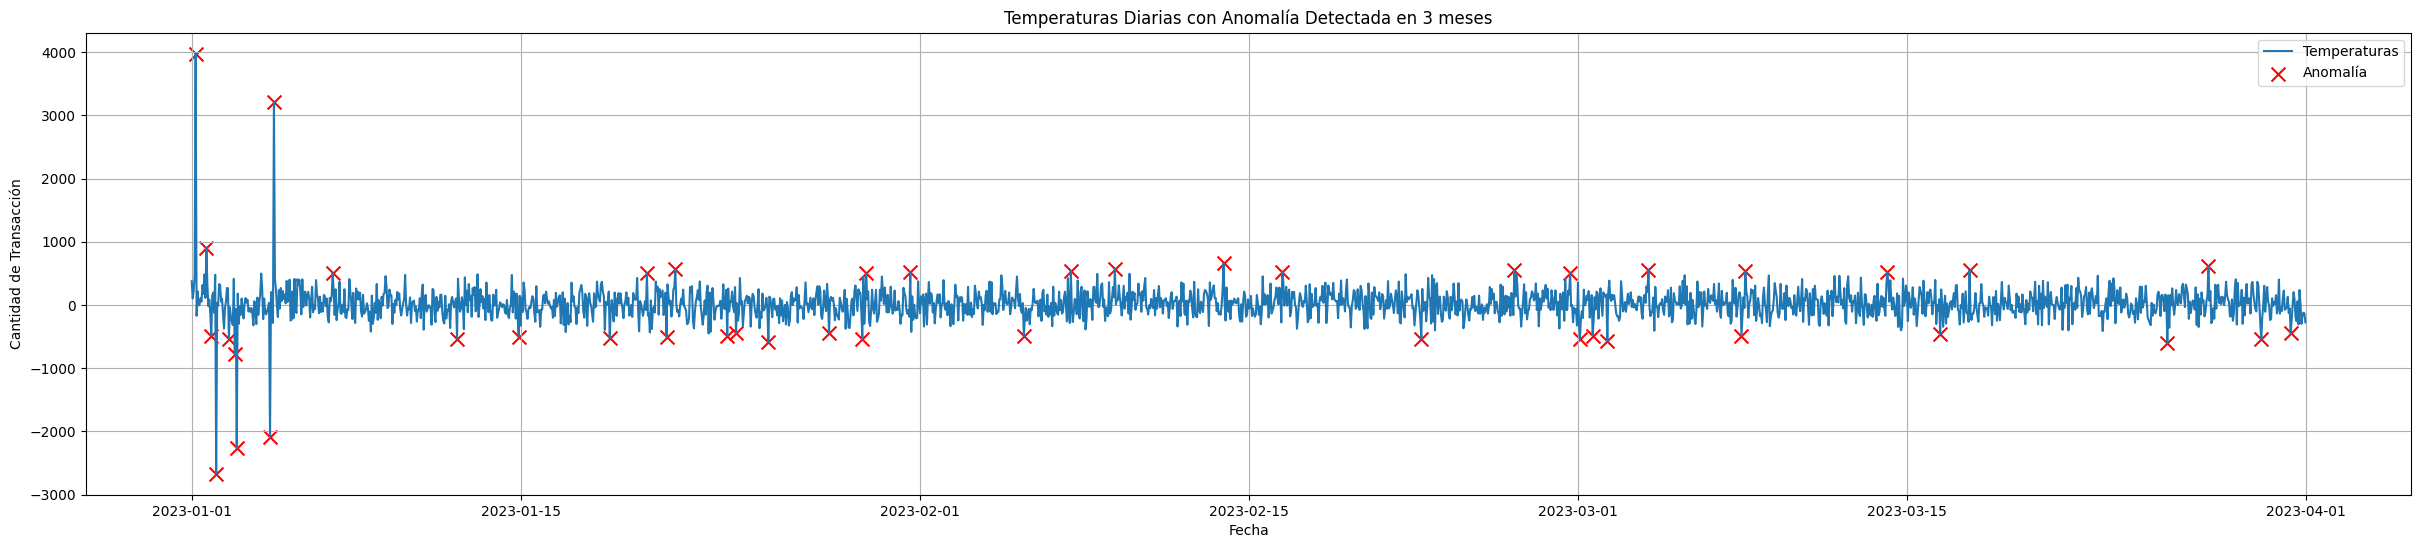